<font size="+3" color=blue><b> <center><u> Heart Disease + EDA + (25+) Models For Beginners </u></center></b></font>

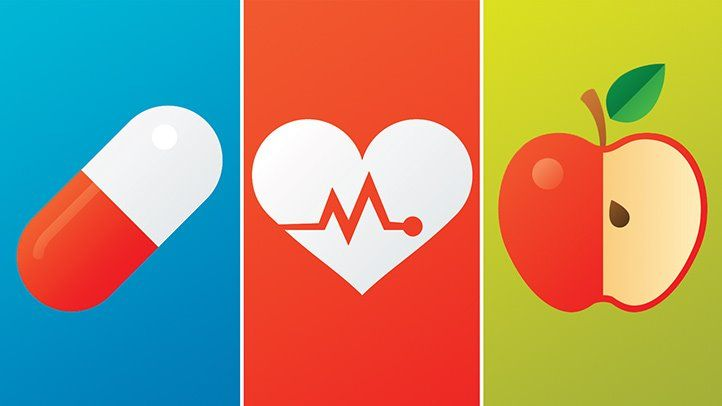

<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>Objective  </center></h2>

Goal of this kernel is following:
- Basic Exploratory Data Analysis.
- Beginners guide on Heart Disease UCI Dataset.
- Feature Analysis
- Modelling on 25+ Models

<font size="+2" color=blue ><b>Please Upvote my kernel and keep it in your favourite section if you think it is helpful.</b></font>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center> Table of content </center></h2>

<font color="blue" size=+1><b>Introduction</b></font>
* [About Data ](#1.1)
* [Data Dictionary ](#1.3)
* [Data Variable](#1.4)
    
<font color="blue" size=+1><b> Load and Check Data </b></font>
* [Importing Library](#2.1)
* [Load Dataset](#2.2)

<font color="blue" size=+1><b> Exploratory Data Analysis </b></font>
* [Missing Value Analysis](#3.1)
* [Target Variable Analysis](#3.2)    
* [Non-Target Variable Analysis](#3.4)   
 
<font color="blue" size=+1><b> Data Handling and Preparation </b></font>
* [Handing Missing Data ](#4.1)
* [Train Test Split ](#4.2)

<font color="blue" size=+1><b> Model Training </b></font>
* [Logistic Regression ](#5.1)
* [K-Nearest Neighbours ](#5.2)    
* [Decision Tree ](#5.3)
* [Naive Bayes ](#5.4)    
* [Linear Discriminant Analysis ](#5.5)
* [LightLGM ](#5.6)    
* [CatBoost ](#5.7)
* [XGBoost ](#5.8)    
* [Ridge Classifier ](#5.9)
* [Quadratic Discriminant Analysis ](#5.10)    
* [Bagging classifier ](#5.11)
* [MLPClassifier](#5.12)    
* [Linear Support Vector Classification ](#5.13)
* [Nu-Support Vector Classification ](#5.14)    
* [BernoulliNB ](#5.15)
* [Passive Aggressive Classifier ](#5.16)    
* [Stochastic Gradient Boosting ](#5.18)    
* [AdaBoost ](#5.19)
* [Extra Trees ](#5.20)    
* [Random Forest ](#5.21)
* [SVC ](#5.22)    
* [H2O ](#5.23)
* [TPOT ](#5.24)    
* [PyCaret ](#5.25)




<a id="1"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Introduction  </center></h2>

<a id="1.1"></a>
<font color="blue" size=+2.5><b> About Data</b></font>
<br/>
<br/>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


## The columns in this dataset are:
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

<a id="2"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Load and Check Data  </center></h2>

<a id="2.1"></a>
<font color="blue" size=+2.5><b> Import Libraries </b></font>


In [ ]:
!pip install TPOT

In [ ]:
!pip install pycaret

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import cufflinks as cf 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.linear_model import RidgeClassifier
from catboost import Pool, CatBoostClassifier, cv
import lightgbm as lgb
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import random


In [ ]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

<a id="2.2"></a>
<font color="blue" size=+2.5><b> Import Dataset </b></font>


In [ ]:
train = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [ ]:
table = ff.create_table(train.head().round(3))
iplot(table,filename='jupyter-table1')

In [ ]:
train.columns


In [ ]:
train.shape


In [ ]:
iplot(ff.create_table(train.dtypes.to_frame().reset_index().round(3)),filename='jupyter-table2')

In [ ]:
iplot(ff.create_table(train.describe().reset_index().round(3)),filename='jupyter-table2')

<a id="3"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Exploratory Data Analysis </center></h2>

<a id="3.1"></a>
<font color="blue" size=+2.5><b> Missing Value Analysis </b></font>


In [ ]:
train.isnull().sum()

In [ ]:
msno.bar(train, color = 'b', figsize = (10,8))

In [ ]:
msno.matrix(train)

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Target Variable Analysis </b></font>


In [ ]:
species_count = train['target'].value_counts()
data = [go.Bar(
    x = species_count.index,
    y = species_count.values,
    marker = dict(color = random_colors(3),line=dict(color='#000000', width=2))
)]

layout = go.Layout(
   {
      "title":"Healthy VS Non Healthy",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
trace = go.Pie(labels = list(train.target.unique()), values = list(train.target.value_counts()),
                            hole = 0.2,
               marker=dict(colors = random_colors(3), 
                           line=dict(color='#000000', width=2)
                           ))
data = [trace]
layout = go.Layout(
   {
      "title":"Healthy VS Non Healthy",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="3.62"></a>
<font color="blue" size=+2.5><b> Correlation </b></font>


In [ ]:
data = [go.Heatmap(z = np.array(train.corr().values),
                   x = np.array(train.corr().columns),
                   y = np.array(train.corr().columns),
                     colorscale='Viridis',)
       ]
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )

fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="3.4"></a>
<font color="blue" size=+2.5><b> Non-Target Variable Analysis </b></font>


<a id="3.43"></a>
<font color="blue" size=+2.5><b> oldpeak Variable Analysis </b></font>

In [ ]:
cols = "oldpeak"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:

Present = train[(train['target'] != 0.0)]
Not_Present = train[(train['target'] != 1.0)]


tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Present', 'Not Present']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(train, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.43"></a>
<font color="blue" size=+2.5><b> thalach Variable Analysis </b></font>

In [ ]:
cols = "thalach"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:

Present = train[(train['target'] != 0.0)]
Not_Present = train[(train['target'] != 1.0)]


tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Present', 'Not Present']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(train, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.43"></a>
<font color="blue" size=+2.5><b> chol Variable Analysis </b></font>

In [ ]:
cols = "chol"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:

Present = train[(train['target'] != 0.0)]
Not_Present = train[(train['target'] != 1.0)]


tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Present', 'Not Present']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(train, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.43"></a>
<font color="blue" size=+2.5><b> trestbps Variable Analysis </b></font>

In [ ]:
cols = "trestbps"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:

Present = train[(train['target'] != 0.0)]
Not_Present = train[(train['target'] != 1.0)]


tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Present', 'Not Present']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=train[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(train, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.41"></a>
<font color="blue" size=+2.5><b> Age Variable Analysis </b></font>

In [ ]:
trace0 = go.Box(
    name = 'age',
    y = train["age"]
)


data = [trace0]


layout = go.Layout(
   {
      "title":"age ",
   }
)


fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
cols = "age"
Present = train[(train['target'] != 0.0)]
Not_Present = train[(train['target'] != 1.0)]


tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Present', 'Not Present']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=train['age'])],layout_title_text=' Age Distribution ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(train, y="age", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.42"></a>
<font color="blue" size=+2.5><b> Sex Variable Analysis </b></font>

In [ ]:
cols = "sex"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)

trace0 = go.Bar(x = train[cols].value_counts().index,y=train[cols].value_counts())

data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
survivedvssex = train[["sex","target"]].groupby(["sex"], as_index = False).mean().sort_values(by="target",ascending = False)
fig = px.bar(survivedvssex, x="sex", y="target",color="target") 
fig.show()

<a id="3.42"></a>
<font color="blue" size=+2.5><b> Cp Variable Analysis </b></font>

In [ ]:
cols = "cp"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)

trace0 = go.Bar(x = train[cols].value_counts().index,y=train[cols].value_counts())

data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
survivedvssex = train[["cp","target"]].groupby(["cp"], as_index = False).mean().sort_values(by="target",ascending = False)
fig = px.bar(survivedvssex, x="cp", y="target",color="target") 
fig.show()

<a id="3.42"></a>
<font color="blue" size=+2.5><b> FBS Variable Analysis </b></font>

In [ ]:
cols = "fbs"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)

trace0 = go.Bar(x = train[cols].value_counts().index,y=train[cols].value_counts())

data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
survivedvssex = train[["fbs","target"]].groupby(["fbs"], as_index = False).mean().sort_values(by="target",ascending = False)
fig = px.bar(survivedvssex, x="fbs", y="target",color="target") 
fig.show()

<a id="3.42"></a>
<font color="blue" size=+2.5><b> restecg Variable Analysis </b></font>

In [ ]:
cols = "restecg"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)

trace0 = go.Bar(x = train[cols].value_counts().index,y=train[cols].value_counts())

data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
survivedvssex = train[["restecg","target"]].groupby(["restecg"], as_index = False).mean().sort_values(by="target",ascending = False)
fig = px.bar(survivedvssex, x="restecg", y="target",color="target") 
fig.show()

<a id="3.42"></a>
<font color="blue" size=+2.5><b> exang Variable Analysis </b></font>

In [ ]:
cols = "exang"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)

trace0 = go.Bar(x = train[cols].value_counts().index,y=train[cols].value_counts())

data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
survivedvssex = train[["exang","target"]].groupby(["exang"], as_index = False).mean().sort_values(by="target",ascending = False)
fig = px.bar(survivedvssex, x="exang", y="target",color="target") 
fig.show()

<a id="3.42"></a>
<font color="blue" size=+2.5><b> slope Variable Analysis </b></font>

In [ ]:
cols = "slope"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)

trace0 = go.Bar(x = train[cols].value_counts().index,y=train[cols].value_counts())

data = [trace0]

layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
survivedvssex = train[["slope","target"]].groupby(["slope"], as_index = False).mean().sort_values(by="target",ascending = False)
fig = px.bar(survivedvssex, x="slope", y="target",color="target") 
fig.show()

<a id="3.42"></a>
<font color="blue" size=+2.5><b> ca Variable Analysis </b></font>

In [ ]:
cols = "ca"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)

trace0 = go.Bar(x = train[cols].value_counts().index,y=train[cols].value_counts())

data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
survivedvssex = train[["ca","target"]].groupby(["ca"], as_index = False).mean().sort_values(by="target",ascending = False)
fig = px.bar(survivedvssex, x="ca", y="target",color="target") 
fig.show()

<a id="3.42"></a>
<font color="blue" size=+2.5><b> thal Variable Analysis </b></font>

In [ ]:
cols = "thal"
trace0 = go.Box(
    name = cols,
    y = train[cols]
)

trace0 = go.Bar(x = train[cols].value_counts().index,y=train[cols].value_counts())

data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
survivedvssex = train[["thal","target"]].groupby(["thal"], as_index = False).mean().sort_values(by="target",ascending = False)
fig = px.bar(survivedvssex, x="thal", y="target",color="target") 
fig.show()

<a id="4.1"></a>
<font color="blue" size=+2.5><b> Data Handling and Preparation </b></font>


In [ ]:
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<a id="5"></a>
<font color="blue" size=+2.5><b> Model Training </b></font>


<a id="5.1"></a>
<font color="blue" size=+2.5><b> Logistic Regression </b></font>

*Logistic regression assumes a Gaussian distribution for the numeric input variables and can
model binary classification problems. You can construct a logistic regression model using the
LogisticRegression class*

In [ ]:
## Logistic Regression

Model = LogisticRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.2"></a>
<font color="blue" size=+2.5><b> K-Nearest Neighbours </b></font>

*The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems*

In [ ]:
# K-Nearest Neighbours

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.3"></a>
<font color="blue" size=+2.5><b> Decision Tree (CART) </b></font>

*Classification and Regression Trees (CART or just decision trees) construct a binary tree from
the training data. Split points are chosen greedily by evaluating each attribute and each value
of each attribute in the training data in order to minimize a cost function (like the Gini index).
You can construct a CART model using the DecisionTreeClassifier class*

In [ ]:
## Decision Tree

Model = DecisionTreeClassifier()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.4"></a>
<font color="blue" size=+2.5><b> Naive Bayes </b></font>

*Naive Bayes calculates the probability of each class and the conditional probability of each class
given each input value. These probabilities are estimated for new data and multiplied together,
assuming that they are all independent (a simple or naive assumption). When working with
real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for
input variables using the Gaussian Probability Density Function. You can construct a Naive
Bayes model using the GaussianNB class*

In [ ]:
## Naive Bayes

Model = GaussianNB()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.5"></a>
<font color="blue" size=+2.5><b> Linear Discriminant Analysis </b></font>

*Linear Discriminant Analysis or LDA is a statistical technique for binary and multiclass
classification. It too assumes a Gaussian distribution for the numerical input variables. You can
construct an LDA model using the LinearDiscriminantAnalysis class.*

In [ ]:
# Linear Discriminant Analysis

Model = LinearDiscriminantAnalysis()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.6"></a>
<font color="blue" size=+2.5><b> LightGBM </b></font>

*LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:*

Faster training speed and higher efficiency.
Lower memory usage.
Better accuracy.
Support of parallel and GPU learning.
Capable of handling large-scale data.

In [ ]:
## Light GBM

params = {'objective':'binary', 'metric':'accuracy'}
  
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

Model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_test], verbose_eval=10)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred.round()))


<a id="5.7"></a>
<font color="blue" size=+2.5><b> CatBoost </b></font>

*CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.*

In [ ]:

Model=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)
Model.fit(X_train,y_train,eval_set=(X_test,y_test))

In [ ]:
## CatBoost
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

<a id="5.8"></a>
<font color="blue" size=+2.5><b> XGBoost </b></font>

*XGBoost stands for Extreme Gradient Boosting, it is a performant machine learning library based on the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. XGBoost implements a Gradient Boosting algorithm based on decision trees.*

In [ ]:
## XGBoost

Model=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

<a id="5.9"></a>
<font color="blue" size=+2.5><b> Ridge Classifier </b></font>

*Classifier using Ridge regression. This classifier first converts the target values into {-1, 1} and then treats the problem as a 
regression task (multi-output regression in the multiclass case).*

In [ ]:
## Ridge Classifier

Model=RidgeClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

<a id="5.10"></a>
<font color="blue" size=+2.5><b> Quadratic Discriminant Analysis </b></font>


*A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
The model fits a **Gaussian** density to each class.*

In [ ]:
## Quadratic Discriminant Analysis

Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

<a id="5.11"></a>
<font color="blue" size=+2.5><b> Bagging classifier  </b></font>

*A Bagging classifier is an ensemble **meta-estimator** that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.*

In [ ]:
## Bagging Classifier

Model=BaggingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

<a id="5.12"></a>
<font color="blue" size=+2.5><b> MLPClassifier  </b></font>

*MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.*

In [ ]:
## MLPClassifier

Model=MLPClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

<a id="5.13"></a>
<font color="blue" size=+2.5><b> Linear Support Vector Classification  </b></font>

*Similar to **SVC** with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.*

In [ ]:
## Linear Support Vector Classification
 
Model = LinearSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.14"></a>
<font color="blue" size=+2.5><b> Nu-Support Vector Classification </b></font>

*Similar to SVC but uses a parameter to control the number of support vectors.*

In [ ]:
## Nu-Support Vector Classification

Model = NuSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.15"></a>
<font color="blue" size=+2.5><b> BernoulliNB </b></font>

*Like MultinomialNB, this classifier is suitable for **discrete data**. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.*

In [ ]:
## BernoulliNB

Model = BernoulliNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.16"></a>
<font color="blue" size=+2.5><b> Passive Aggressive Classifier </b></font>

*Like MultinomialNB, this classifier is suitable for **discrete data**. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.*
The Passive-Aggressive algorithms are a family of Machine learning algorithms that are not very well known by beginners and even intermediate Machine Learning enthusiasts. However, they can be very useful and efficient for certain applications.

In [ ]:
## Passive Aggressive Classifier

Model = PassiveAggressiveClassifier()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.18"></a>
<font color="blue" size=+2.5><b> Stochastic Gradient Boosting </b></font>

*Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of the best techniques available for improving performance via ensembles. You can construct a Gradient Boosting model for classification using the GradientBoostingClassifier class*

In [ ]:
## Gradient Boosting Machine
Model = GradientBoostingClassifier(n_estimators=100, random_state=9)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))


<a id="5.19"></a>
<font color="blue" size=+2.5><b> 
AdaBoost </b></font>

*AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or less attention to them in the construction of subsequent models. You can construct an AdaBoost model for classification using the AdaBoostClassifier class*

In [ ]:
## Adaboost

Model = AdaBoostClassifier(n_estimators=100, random_state=9)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))


<a id="5.20"></a>
<font color="blue" size=+2.5><b> Extra Trees </b></font>

*Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset. You can construct an Extra Trees model for classification using the ExtraTreesClassifier class*

In [ ]:
## Extra Trees

Model = ExtraTreesClassifier(n_estimators=100, max_features=3)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))


<a id="5.21"></a>
<font color="blue" size=+2.5><b> Random Forest </b></font>

*Random Forests is an extension of bagged decision trees. Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of each tree, only a random subset of features are considered for each split. You can construct a Random Forest model for classification using the RandomForestClassifier class.*

In [ ]:

## Random Forest

Model = RandomForestClassifier(n_estimators=100, max_features=3)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.22"></a>
<font color="blue" size=+2.5><b> Support Vector Machine </b></font>

*Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes Of particular importance is the use of different kernel functions via the kernel parameter .A powerful Radial Basis Function is used by default. You can construct an SVM model using the SVC class.*

In [ ]:
## Support Vector Machine

Model = SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

<a id="5.23"></a>
<font color="blue" size=+2.5><b> H2O </b></font>

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

In [ ]:
data = h2o.import_file('/kaggle/input/heart-disease-uci/heart.csv')

# Identify predictors and response
x = data.columns
y = "target"
x.remove(y)

data[y] = data[y].asfactor()

aml = H2OAutoML(max_models=20, max_runtime_secs=1500, seed=1)
aml.train(x=x, y=y, training_frame=data)

In [ ]:
lb = aml.leaderboard
lb.head()

<a id="5.24"></a>
<font color="blue" size=+2.5><b> TPOT </b></font>

In [ ]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor

tpot = TPOTClassifier(generations=5, verbosity=2)
tpot.fit(X_train,y_train)


In [ ]:
y_pred=tpot.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

<a id="5.25"></a>
<font color="blue" size=+2.5><b> Pycaret </b></font>


In [ ]:
! pip install -U pycaret # Quite large depencies to install !

In [ ]:
from pycaret.classification import *

clf1 = setup(data = train, 
             target = 'target',
             silent = True)


In [ ]:
compare_models()


In [ ]:
lgbm  = create_model('catboost')      

In [ ]:
plot_model(estimator = lgbm, plot = 'learning')


# Upvote The Kernel If you like my work